## import numpy pandas sklearn and matplotlib

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



## read data into a dataframe and define function to shuffle data easily

In [ ]:
df = pd.read_csv('star_classification.csv')
df.head()

def shuffle_data(df, random_state=None):
    """
    Shuffles the rows of a Pandas DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to shuffle.
        random_state (int, optional): Seed for reproducibility. Default is None.

    Returns:
        pd.DataFrame: A new DataFrame with rows shuffled.
    """
    return df.sample(frac=1, random_state=42).reset_index(drop=True)
df = shuffle_data(df)
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237679e+18,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,7712,301,6,442,4.855017e+18,GALAXY,0.506237,4312,55511,495
1,1.237662e+18,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,3894,301,1,243,2.448928e+18,STAR,0.000345,2175,54612,348
2,1.237679e+18,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,7717,301,1,536,8.255357e+18,STAR,0.000004,7332,56683,943
3,1.237668e+18,247.594401,10.887780,24.99961,21.71203,21.47148,21.30532,21.29109,5323,301,1,134,4.577999e+18,STAR,-0.000291,4066,55444,326
4,1.237679e+18,18.896451,-5.261330,23.76648,21.79737,20.69543,20.23403,19.97464,7881,301,3,148,8.910472e+18,STAR,-0.000136,7914,57331,363


In [ ]:
label_mapping = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
df['class_encoded'] = df['class'].map(label_mapping)

# Helper functions

In [ ]:
# def undersample(X_train, y_train):
#   rus = RandomUnderSampler(random_state=42)
#   X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
#   return X_train_resampled, y_train_resampled

In [ ]:
def oversample(X_train, y_train):
  smote = SMOTE(random_state=42)
  return smote.fit_resample(X_train, y_train)

In [ ]:
# play this to split into training and testing X and y
X = df[['u', 'g', 'r', 'i', 'z']]
# X = df[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#X_train, y_train = undersample(X_train, y_train)
X_train, y_train = oversample(X_train, y_train)

In [ ]:
# def plot_residuals(y_test, y_pred):
#   residuals = y_test - y_pred

#   sample_size = 30
#   indices = residuals.index[:sample_size]
#   residuals = residuals.loc[indices]

#   plt.figure(figsize=(10, 6))

#   plt.bar(range(len(residuals)), residuals, color='blue', alpha=0.5)
#   plt.axhline(0, color='black', linewidth=2, linestyle='--')

#   plt.title('Residuals: Predicted vs Actual')
#   plt.xlabel('Index')
#   plt.ylabel('Residuals (Actual - Predicted)')

#   plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["GALAXY", "STAR", "QUASAR"])
  disp.plot(cmap="Blues")
  plt.title("Confusion Matrix")
  plt.show()

In [ ]:
#entropy function for functions which output probabiltiy spreads so variance doesnt make as much sense for looking at uncertainty in model predictions
def entropy(probabilities):
    return -np.sum(probabilities * np.log(probabilities + 1e-10), axis=1)

In [ ]:
#play this block to shuffle the data
df = shuffle_data(df)

# Baseline Dummy Classifier

Dummy Classifier Accuracy: 0.59


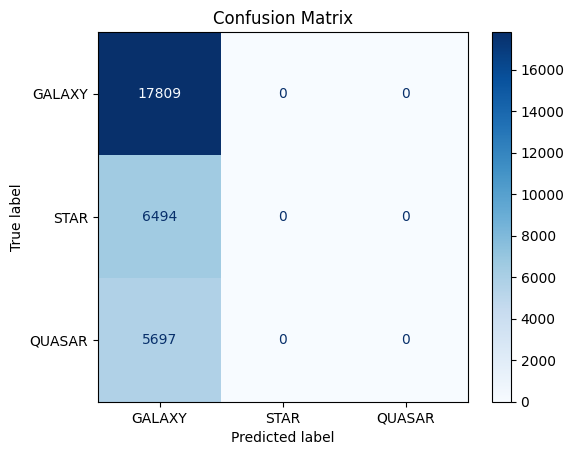

In [ ]:
#predicts most frequesnt class
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dummy Classifier Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

# Baseline Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Model Accuracy: 0.67


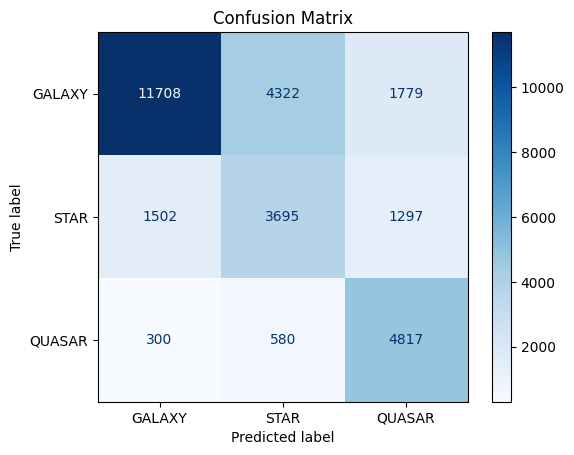

In [ ]:
#scale and pipeline it in this case to help w convergence and to b ab;e to use softmax

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=300, multi_class='multinomial', solver='lbfgs'))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

y_pred = pipe.predict(X_test)

#exrtacting model for use in voting classifier lol
logr = pipe.named_steps['logisticregression']


# y_pred_proba = pipe.predict_proba(X_test)
# print("Probabilities for the first sample:", y_pred_proba[0])

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)


# Decision Tree model

Decision Tree Model Accuracy: 0.81
Probabilities for the first few predictions:
 [[0.85138387 0.14259928 0.00601685]
 [0.93918919 0.03909266 0.02171815]
 [0.045053   0.68992933 0.26501767]
 [0.56202532 0.43544304 0.00253165]
 [0.84906034 0.10108803 0.04985163]]
Uncertainty (variance) for the first few predictions:
 [0.84536703 0.91747104 0.64487633 0.55949367 0.7992087 ]


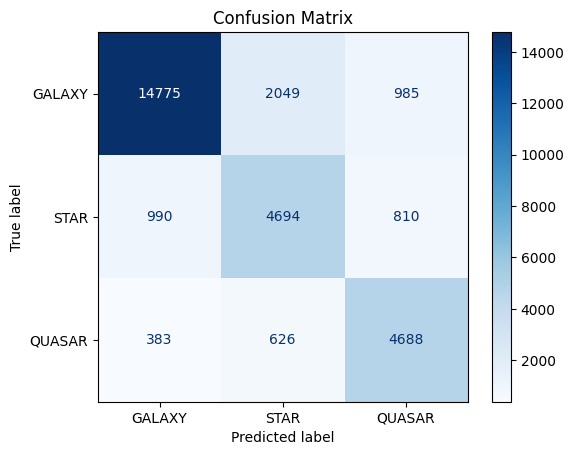

In [ ]:
pipe = make_pipeline(DecisionTreeClassifier(max_depth=10, random_state=42))
pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)  # Get class probabilities

y_uncertainty = y_prob.max(axis=1) - y_prob.min(axis=1)

#extraction for later voting clf ignore pls
dt_model = pipe.named_steps['decisiontreeclassifier']


print("Probabilities for the first few predictions:\n", y_prob[:5])
print("Uncertainty (variance) for the first few predictions:\n", y_uncertainty[:5])


# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)

# y_pred = dt_model.predict(X_test)


# accuracy = accuracy_score(y_test, y_pred)
# print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

# Naive Bayes Classification (Gaussian)

Gaussian Naive Bayes Model Accuracy: 0.48
Probabilities for the first few predictions:
 [[3.93889392e-01 6.05890182e-01 2.20426139e-04]
 [1.88506158e-01 8.11493517e-01 3.25440958e-07]
 [1.34058441e-01 7.76615432e-02 7.88280016e-01]
 [3.43334737e-01 6.56632043e-01 3.32204903e-05]
 [8.72806599e-01 8.06225559e-02 4.65708456e-02]]
Uncertainty (variance) for the first few predictions:
 [0.06297283 0.12024099 0.10401834 0.07190368 0.14570896]


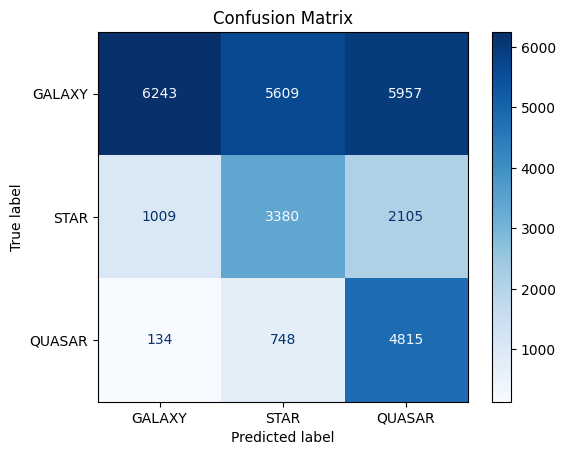

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_prob = gnb.predict_proba(X_test)
y_uncertainty = np.var(y_prob, axis=1)

print(f"Gaussian Naive Bayes Model Accuracy: {accuracy:.2f}")
print("Probabilities for the first few predictions:\n", y_prob[:5])
print("Uncertainty (variance) for the first few predictions:\n", y_uncertainty[:5])

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)


# Linear SVC (Support Vector Classifier)


In [ ]:
# from sklearn import svm

# svc = svm.LinearSVC(random_state=42)
# svc.fit(X_train, y_train)

# y_pred = svc.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"LinearSVC Model Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
# plot_confusion_matrix(y_test, y_pred)

# KNN classifier (K nearest neighbors)

KNN Model Accuracy: 0.85
Probabilities for the first few predictions:
 [[1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.9 0.1]
 [1.  0.  0. ]
 [1.  0.  0. ]]
Uncertainty (entropy not varaince here) for the first few predictions:
 [-1.00000008e-10 -1.00000008e-10  3.25082973e-01 -1.00000008e-10
 -1.00000008e-10]


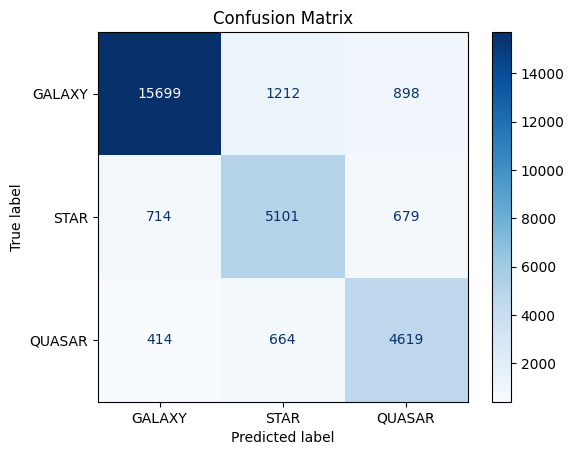

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_prob = knn.predict_proba(X_test)
y_uncertainty = entropy(y_prob)

print(f"KNN Model Accuracy: {accuracy:.2f}")
print("Probabilities for the first few predictions:\n", y_prob[:5])
print("Uncertainty (entropy not varaince here) for the first few predictions:\n", y_uncertainty[:5])

# accuracy = accuracy_score(y_test, y_pred)
# print(f"KNN Model Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

# MLP Classifier (Multi-Layer Perception algo)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Probabilities for the first few predictions:
 [[0.7193702  0.20607425 0.07455555]
 [0.72190609 0.20413556 0.07395835]
 [0.72190609 0.20413556 0.07395835]
 [0.72190609 0.20413556 0.07395835]
 [0.72190609 0.20413556 0.07395835]]
Uncertainty (entropy) for the first few predictions:
 [0.75600562 0.75221223 0.75221223 0.75221223 0.75221223]
MLPClassifier Model Accuracy: 0.80


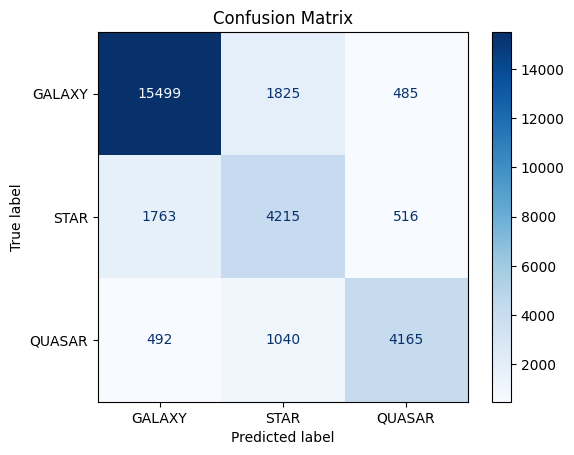

In [ ]:



mlp = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter=500, random_state=42)
pipe = make_pipeline(StandardScaler(), mlp)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)

#exrtacting model for use in voting classifier lol
mlp = pipe.named_steps['mlpclassifier']

# mlp.fit(X_train, y_train)
# y_pred = mlp.predict(X_test)

y_prob = mlp.predict_proba(X_test)
y_uncertainty = entropy(y_prob)
print("Probabilities for the first few predictions:\n", y_prob[:5])
print("Uncertainty (entropy) for the first few predictions:\n", y_uncertainty[:5])

accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Model Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

# Neural Network

In [ ]:
!pip install tensorflow

In [ ]:

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70, batch_size=32)






Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5996 - loss: 1.1026 - val_accuracy: 0.7565 - val_loss: 0.6795
Epoch 2/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7207 - loss: 0.7032 - val_accuracy: 0.7545 - val_loss: 0.6694
Epoch 3/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7146 - loss: 0.7049 - val_accuracy: 0.7464 - val_loss: 0.6422
Epoch 4/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7304 - loss: 0.7390 - val_accuracy: 0.7638 - val_loss: 0.6388
Epoch 5/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7465 - loss: 0.6574 - val_accuracy: 0.7901 - val_loss: 0.5942
Epoch 6/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7500 - loss: 0.6542 - val_accuracy: 0.7696 - val_loss: 0.6342
Epoch 7/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7440 - loss: 0.6617 - val_accuracy: 0.7871 - val_loss: 0.5928
Epoch 8/70
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7489 - loss: 0.6581 - val_accur

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8155 - loss: 0.5353
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.8102999925613403
Probabilities for the first few predictions:
 [[0.2949849  0.04815694 0.65685815]
 [0.3087138  0.04635661 0.6449296 ]
 [0.8925029  0.0857252  0.02177184]
 [0.23136234 0.6480583  0.12057932]
 [0.8548952  0.09578426 0.04932067]]
Uncertainty (entropy) for the first few predictions:
 [0.78226984 0.7880984  0.3954174  0.8748518  0.5071306 ]


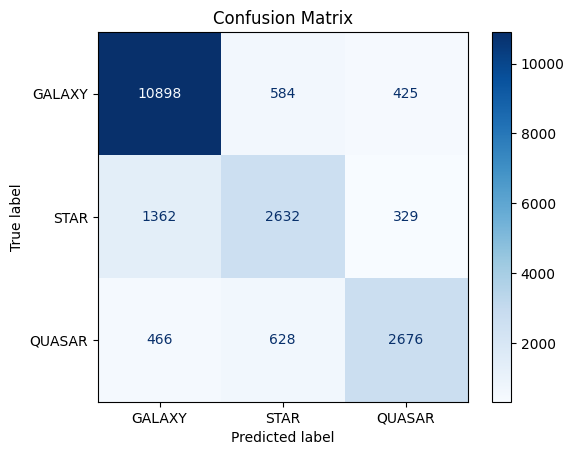

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

y_uncertainty = entropy(y_prob)

print(f"Test Accuracy: {accuracy}")
print("Probabilities for the first few predictions:\n", y_prob[:5])
print("Uncertainty (entropy) for the first few predictions:\n", y_uncertainty[:5])
plot_confusion_matrix(y_test, y_pred)
# plot_residuals(y_test, y_pred)

# Voting Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.85


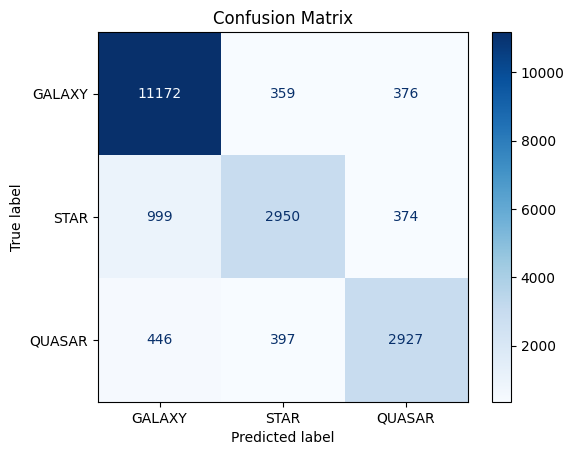

In [ ]:


voting_classifier = VotingClassifier(
    estimators=[
        ('decision tree', dt_model),
        ('knn', knn),
        ('mlp', mlp),
        ('logr', logr)
    ],
    voting='soft'
)

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

# plot_residuals(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)